## Flower classification with Convolutional Neural Networks

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "../../../data/flowers/"
sz=224

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

## First look at cat pictures

In [7]:
os.listdir(PATH)


['valid', 'models', 'train', 'tmp']

In [8]:
os.listdir(f'{PATH}valid')

['rose', 'tulip']

In [9]:
files = os.listdir(f'{PATH}valid/rose')[:5]
files

['9609569441_eeb8566e94.jpg',
 '685724528_6cd5cbe203.jpg',
 '9702378513_229a96b754_m.jpg',
 '9167147034_0a66ee3616_n.jpg',
 '7304710956_015b41f802_m.jpg']

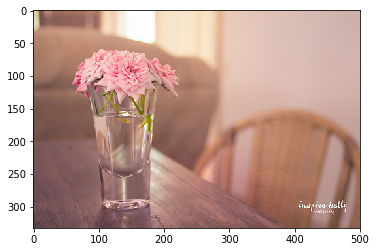

In [10]:
img = plt.imread(f'{PATH}valid/rose/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [11]:
img.shape

(333, 500, 3)

In [12]:
img[:4,:4]

array([[[225, 213, 175],
        [225, 213, 173],
        [225, 211, 172],
        [223, 210, 168]],

       [[226, 212, 175],
        [226, 212, 173],
        [225, 211, 172],
        [223, 210, 168]],

       [[227, 213, 176],
        [227, 213, 174],
        [225, 211, 172],
        [222, 209, 167]],

       [[227, 213, 176],
        [227, 213, 176],
        [225, 211, 172],
        [222, 210, 170]]], dtype=uint8)

In [27]:
# Uncomment the below if you need to reset your precomputed activations
 #shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [28]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


epoch      trn_loss   val_loss   accuracy                 
    0      0.51667    0.230866   0.903333  
    1      0.397796   0.235564   0.913333                 
    2      0.328355   0.201882   0.933333                 



[array([0.20188]), 0.9333333309491475]

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (i.e. those with highest probability that are correct)
4. The most incorrect labels of each class (i.e. those with highest probability that are incorrect)
5. The most uncertain labels (i.e. those with probability closest to 0.5).

In [29]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['rose', 'tulip']

In [31]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape


(300, 2)

In [32]:
log_preds[:10]

array([[-0.21478, -1.64361],
       [-0.01302, -4.34774],
       [-0.021  , -3.87391],
       [-0.19492, -1.73104],
       [-0.00416, -5.48493],
       [-0.0313 , -3.47977],
       [-0.02424, -3.73189],
       [-0.01026, -4.58461],
       [-0.02019, -3.91252],
       [-0.08849, -2.46883]], dtype=float32)

In [33]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [34]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [35]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [36]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


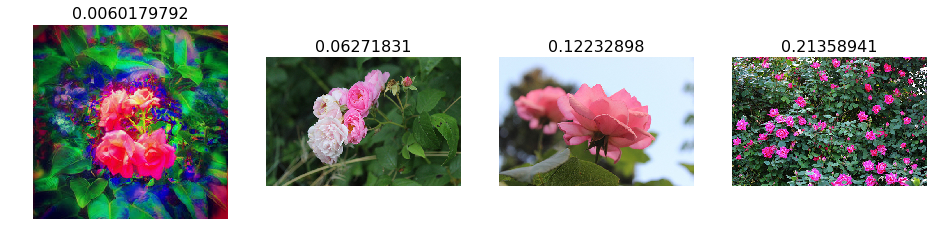

In [37]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


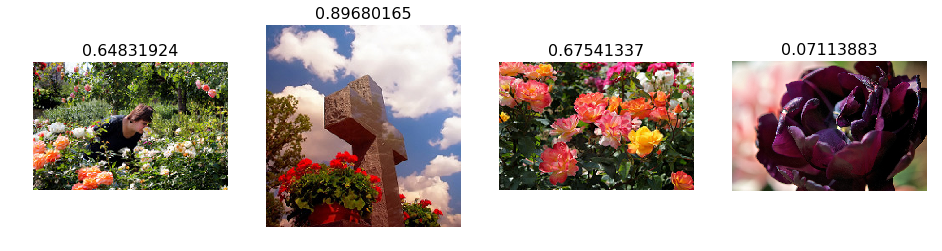

In [38]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [39]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct roses


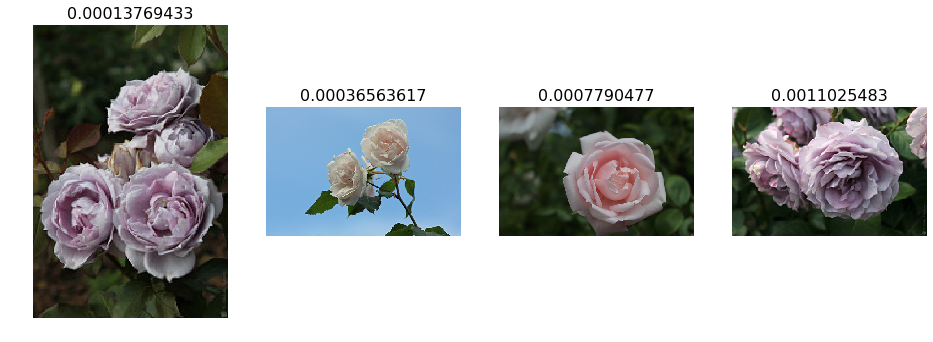

In [40]:
plot_val_with_title(most_by_correct(0, True), "Most correct roses")

Most correct tulips


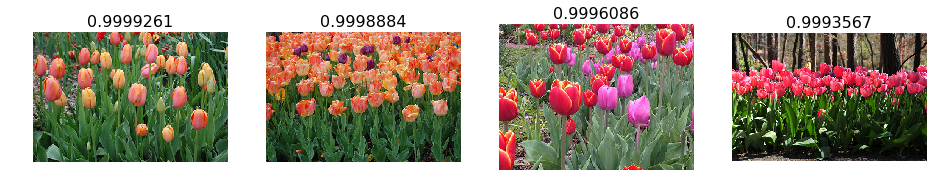

In [41]:
plot_val_with_title(most_by_correct(1, True), "Most correct tulips")

Most incorrect roses


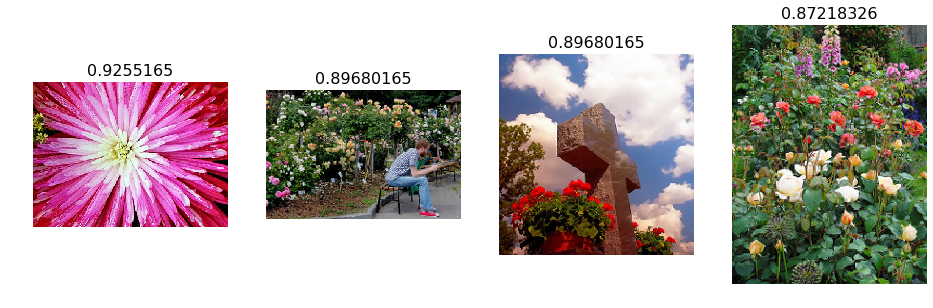

In [42]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect roses")

Most incorrect tulips


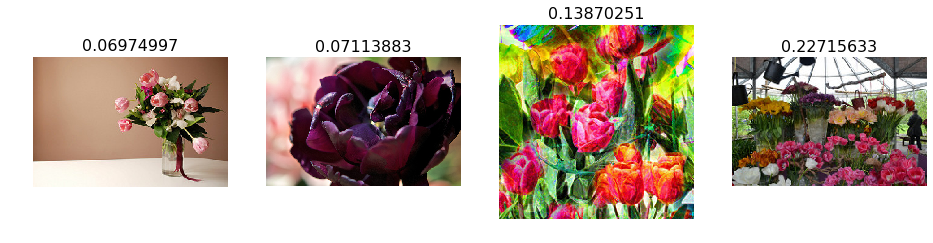

In [43]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect tulips")

Most uncertain predictions


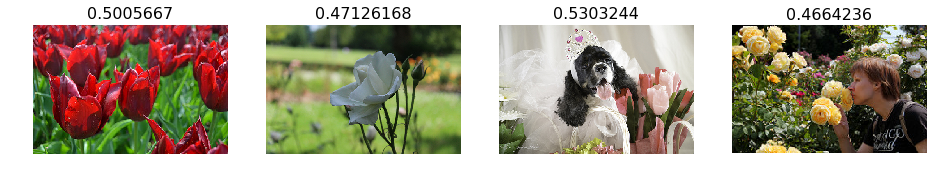

In [44]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

In [63]:
learn = ConvLearner.pretrained(arch, data, precompute=True)


In [64]:
lrf=learn.lr_find()

 35%|███▍      | 8/23 [00:00<00:00, 35.34it/s, loss=0.982]


Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

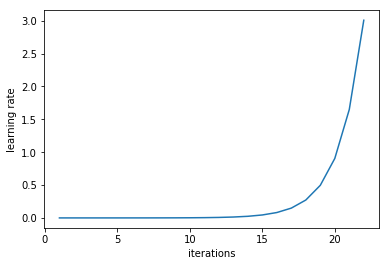

In [65]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/batch_size) iterations of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

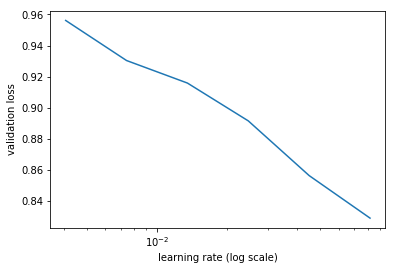

In [66]:
learn.sched.plot()

## Improving our model

### Data augmentation

In [80]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [81]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [82]:
ims = np.stack([get_augs() for i in range(6)])

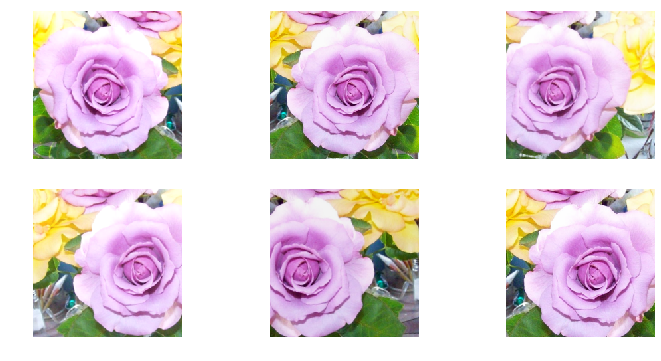

In [83]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [84]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [85]:
learn.fit(0.01, 3)

epoch      trn_loss   val_loss   accuracy                 
    0      0.53583    0.273439   0.89      
    1      0.413481   0.257533   0.896667                 
    2      0.338117   0.254495   0.903333                  



[array([0.25449]), 0.9033333341280619]

In [86]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [87]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.255197   0.241338   0.913333  
    1      0.256652   0.236844   0.903333                  
    2      0.266714   0.235888   0.916667                  



[array([0.23589]), 0.9166666706403096]

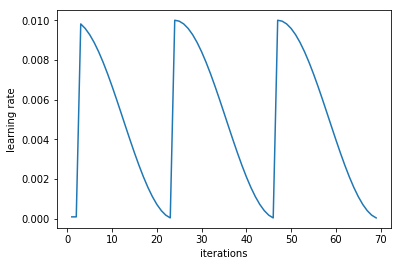

In [88]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [89]:
learn.save('224_lastlayer')

In [108]:
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

In [109]:
learn.unfreeze()

In [110]:
lr=np.array([1e-6,1e-4,1e-2])

In [111]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.369392   0.288183   0.89      
    1      0.347317   0.279468   0.886667                  
    2      0.306669   0.276586   0.896667                  
    3      0.290655   0.247219   0.906667                  
    4      0.267149   0.239343   0.91                      
    5      0.258186   0.239016   0.906667                  
    6      0.242329   0.240486   0.903333                  


[array([0.24049]), 0.9033333341280619]

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

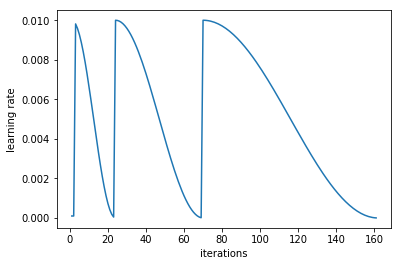

In [112]:
learn.sched.plot_lr()

In [113]:
learn.save('224_all')

In [114]:
learn.load('224_all')

In [115]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [116]:
accuracy_np(probs, y)

0.9233333333333333

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [117]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[132  18]
 [  5 145]]


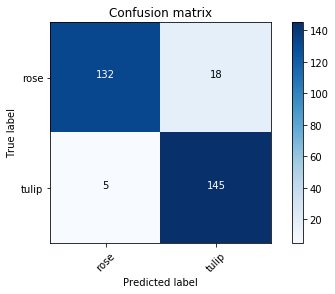

In [119]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect roses


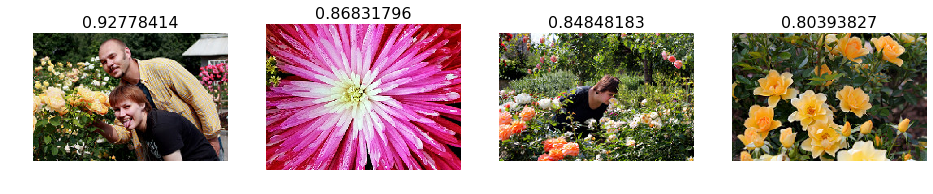

In [120]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect roses")

Most incorrect tulips


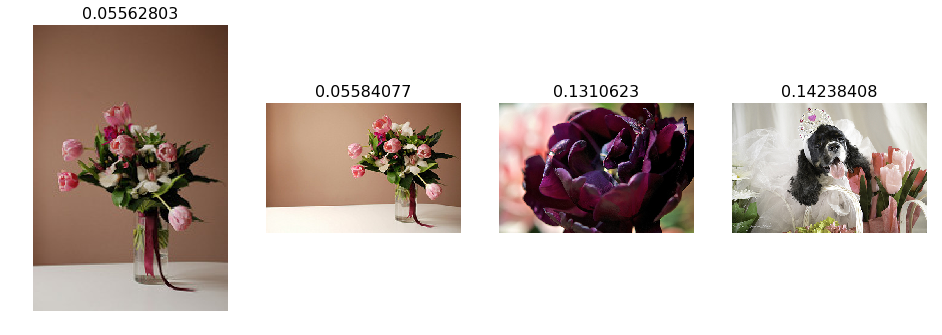

In [121]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect tulips")

## Review: easy steps to train a world-class image classifier

1. precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting